<a href="https://colab.research.google.com/github/milesba4/CS158-ML/blob/main/homework17%20(Recurrent%20NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 17**

Here are all the imports you will need for this assigment:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam


To begin we make up some sequential data and visualize it:

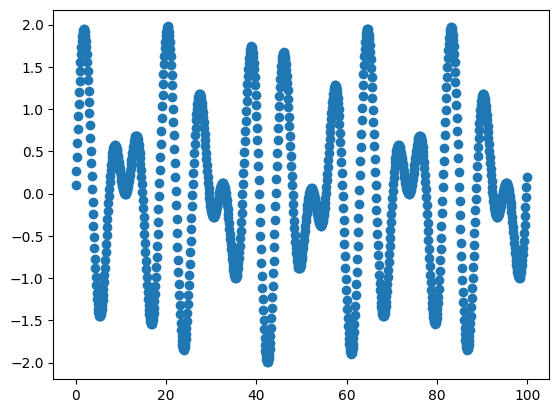

In [ ]:
t=np.arange(1000)/10
data=np.sin(t)+np.sin(0.7*t+0.1)

plt.scatter(t,data)

Now, we break up `data` into sequences of length 10.  For each such seqence, we define a target `y` which is the next data value.

In [ ]:
X=[]
y=[]
for i in range(1000-11):
  X.append(data[i:i+10])
  y.append(data[i+10])
  
X=np.array(X)
y=np.array(y)

X.shape, y.shape


((989, 10), (989,))

To see what we have just created, look at X[1] (a data sequence of length 10), and y[1], the value we would like to predict:

In [ ]:
X[1], y[1]
X

array([[ 0.09983342,  0.26901577,  0.43637196, ...,  1.20057871,
         1.33047294,  1.45019654],
       [ 0.26901577,  0.43637196,  0.60057884, ...,  1.33047294,
         1.45019654,  1.55882708],
       [ 0.43637196,  0.60057884,  0.76033881, ...,  1.45019654,
         1.55882708,  1.6555363 ],
       ...,
       [-0.93087582, -0.89145519, -0.84274596, ..., -0.467813  ,
        -0.36944006, -0.26464873],
       [-0.89145519, -0.84274596, -0.78488048, ..., -0.36944006,
        -0.26464873, -0.15419183],
       [-0.84274596, -0.78488048, -0.71808621, ..., -0.26464873,
        -0.15419183, -0.03889357]])

To feed the sequences into a recurrent neural network, we have to get the input shape correct. This is required to be (num_sequences, sequence_length, num_features). Since each element of each sequence is just a single number (rather than a vector of numbers), the number of features is 1. So we reshape as follows:

In [ ]:
X=X.reshape(989,10,1)


Do an 80/20 train/test split to obtain Xtrain, Xtest, ytrain and ytest.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = .2)
Xtrain

array([[[ 0.56740932],
        [ 0.57193508],
        [ 0.56991873],
        ...,
        [ 0.47689092],
        [ 0.44548238],
        [ 0.41125793]],

       [[-1.23542447],
        [-1.11950037],
        [-0.99725835],
        ...,
        [-0.33072383],
        [-0.19440558],
        [-0.05973387]],

       [[ 1.81039003],
        [ 1.86740754],
        [ 1.91025893],
        ...,
        [ 1.90679241],
        [ 1.86320905],
        [ 1.80610279]],

       ...,

       [[ 1.10891645],
        [ 1.06924767],
        [ 1.0224792 ],
        ...,
        [ 0.70844427],
        [ 0.63529237],
        [ 0.56065848]],

       [[ 1.1572291 ],
        [ 1.29015504],
        [ 1.4132227 ],
        ...,
        [ 1.85076695],
        [ 1.89816588],
        [ 1.93120073]],

       [[-0.52598408],
        [-0.42881942],
        [-0.33236696],
        ...,
        [ 0.10989231],
        [ 0.1852062 ],
        [ 0.25472595]]])

Now define the model! You only need three layers: an Input layer, an RNN layer, and a Dense layer. You can try different numbers of RNN units, different activation functions, dropout levels, etc.  

In [ ]:
model=Sequential()
model.add(InputLayer((10,1))) #Input shape is (sequence_length,num_features)
model.add(SimpleRNN(units=4, activation= 'relu', dropout=.1, recurrent_dropout=.1 ))
model.add(Dense(1))

Now, take a look at your model. Make sure you understand the number of parameters in each layer!

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 24        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


Compile your model. What's the right loss function to use for this kind of task?

In [ ]:
model.compile(optimizer="Adam", loss = "mean_squared_error")

Fit your model to the training data. You should play with the number of epochs.

In [ ]:
model.fit(x=Xtrain, y=ytrain, epochs=60)

Epoch 1/60
25/25 [==============================] - 1s 3ms/step - loss: 1.0491
Epoch 2/60
25/25 [==============================] - 0s 3ms/step - loss: 0.9704
Epoch 3/60
25/25 [==============================] - 0s 3ms/step - loss: 0.9076
Epoch 4/60
25/25 [==============================] - 0s 3ms/step - loss: 0.8653
Epoch 5/60
25/25 [==============================] - 0s 3ms/step - loss: 0.8149
Epoch 6/60
25/25 [==============================] - 0s 3ms/step - loss: 0.7690
Epoch 7/60
25/25 [==============================] - 0s 3ms/step - loss: 0.7307
Epoch 8/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6659
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6055
Epoch 10/60
25/25 [==============================] - 0s 3ms/step - loss: 0.5851
Epoch 11/60
25/25 [==============================] - 0s 3ms/step - loss: 0.5066
Epoch 12/60
25/25 [==============================] - 0s 3ms/step - loss: 0.4627
Epoch 13/60
25/25 [==============================

Evaluate the loss on the test data. Your goal is to have created a model with a loss that is consistently under 0.05 for the test data.

In [ ]:
loss=model.evaluate(Xtest,ytest)
loss

7/7 [==============================] - 0s 2ms/step - loss: 0.0297


0.029741056263446808

Another way to see how good your model is would be to plot the predicted values (in red) based on each subsequence against the actual values (in blue). Run this code block to see that: 

31/31 [==============================] - 0s 1ms/step


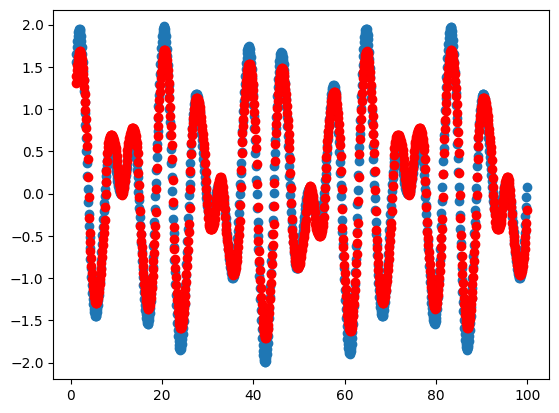

In [ ]:
plt.scatter(t[11:],y)
plt.scatter(t[11:],model.predict(X),c='r')